In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv("Downloads/pi docs/tweet/twitter_training.csv")

In [3]:
d

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
d.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
hn=['num','org','impact','comment']

In [6]:
d=pd.read_csv("Downloads/pi docs/tweet/twitter_training.csv",header=None,skiprows=1,names=hn)

In [7]:
d

,num,org,impact,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
d["comment"]=d["comment"].str.replace("[a^-zA-Z#]"," ")
d.head()

,num,org,impact,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
d["comment"]=d["comment"].astype(str)
d["comment"]=d["comment"].fillna('')
tokens=d["comment"].apply(lambda x: x.split())

In [10]:
tokens.head()

0    [I, am, coming, to, the, borders, and, I, will...
1    [im, getting, on, borderlands, and, i, will, k...
2    [im, coming, on, borderlands, and, i, will, mu...
3    [im, getting, on, borderlands, 2, and, i, will...
4    [im, getting, into, borderlands, and, i, can, ...
Name: comment, dtype: object

In [11]:
from wordcloud import WordCloud

In [12]:
aw=" ".join([sentence for sentence in d["comment"]])
wc=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(aw)

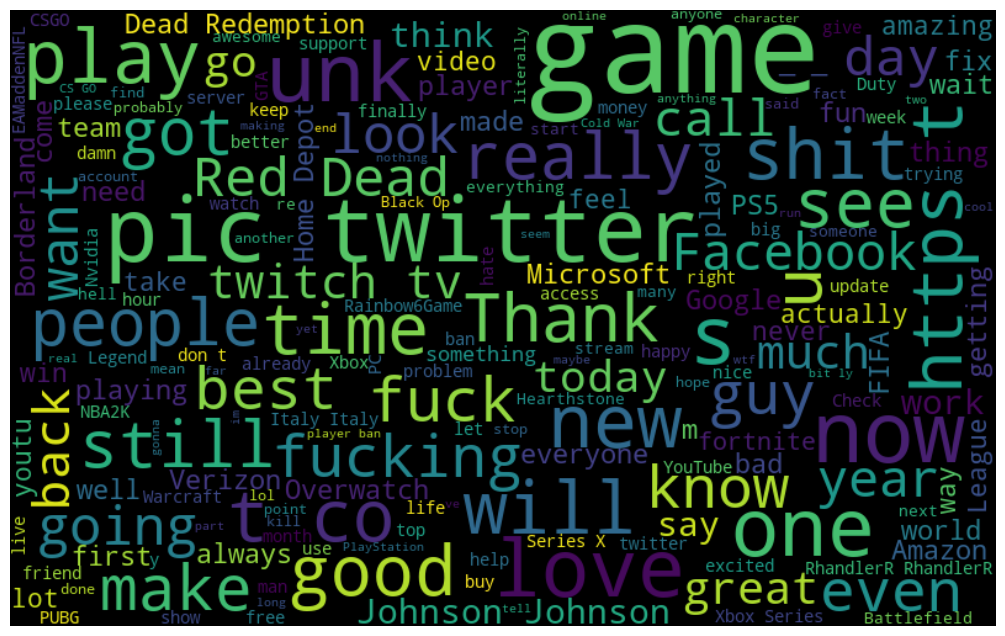

In [13]:
plt.figure(figsize=(15,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   num      74681 non-null  int64 
 1   org      74681 non-null  object
 2   impact   74681 non-null  object
 3   comment  74681 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Text(0, 0.5, 'Count')

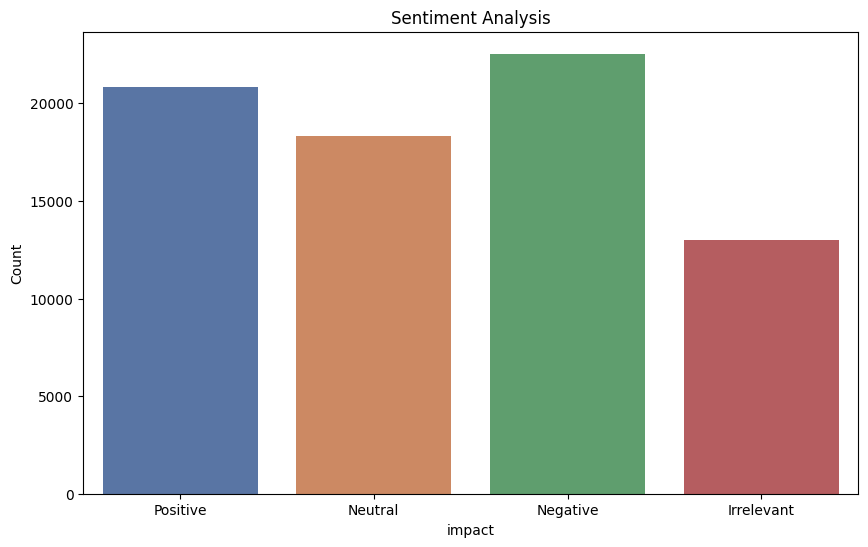

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='impact',data=d,palette='deep',legend=False,hue='impact')
plt.title('Sentiment Analysis')
plt.xlabel('impact')
plt.ylabel('Count')

In [16]:
ic=d['impact'].value_counts()

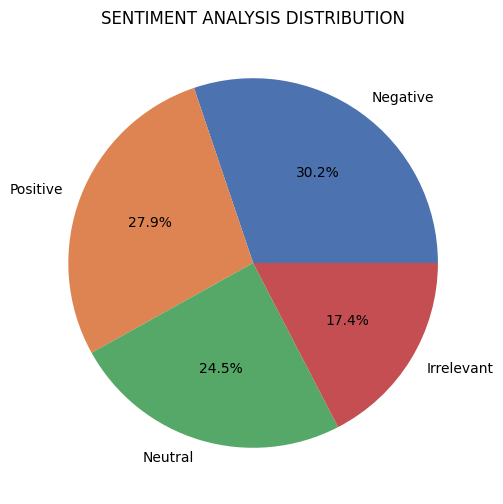

In [17]:
plt.figure(figsize=(10,6))
plt.pie(ic,labels=ic.index,autopct='%1.1f%%',colors=sns.color_palette('deep'))
plt.title('SENTIMENT ANALYSIS DISTRIBUTION')
plt.show()

In [18]:
d.describe()

,num
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000
